# Pigskin Playcaller

### Author: David Shin

### Overview

Every year, data and analytics in sports continues to expand. With the union of my personal interest in the sport of Football and the need for an analytical approach to the game, I have decided to create a model that will recommend a defensive coverage scheme against the offense. Data science takes an unbiased approach to the sport and can provide calculated decision making to coaches and players. My data comes from a Kaggle contest where the data is provided by the NFL. Also used was a dataset from Telemetry Sports that looks at the coverage schemes used by the defense. The last piece of data was from nflfastR that provides weather condition and other variables for the events.

https://www.kaggle.com/c/nfl-big-data-bowl-2021/data

https://twitter.com/nflfastr?lang=en

## Import Mods/Libraries

In [ ]:
import pandas as pd
import glob
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
import streamlit as st
from sklearn.model_selection import cross_validate
# path = r'C:\Users\admin\Documents\Flatiron\capstone\pigskin\data\weekly' # use your path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df_weekly = pd.concat(li, axis=0, ignore_index=True)

## Data Loading and Cleaning

In [2]:
#Loading Data
players = pd.read_csv('data/players.csv')
df_games = pd.read_csv('data/weekly/week1.csv')
df_plays = pd.read_csv('data/plays.csv')
df_fo = pd.read_csv('data/2018fo.csv')
df_coverages = pd.read_csv('data/coverages_week1.csv')
df_fastr = data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(2018) + '.csv.gz?raw=True',compression='gzip', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
df_fastr.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assi

In [4]:
#View Datatypes of all Columns
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986022 entries, 0 to 986021
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           986022 non-null  object 
 1   x              986022 non-null  float64
 2   y              986022 non-null  float64
 3   s              986022 non-null  float64
 4   a              986022 non-null  float64
 5   dis            986022 non-null  float64
 6   o              919109 non-null  float64
 7   dir            919109 non-null  float64
 8   event          986022 non-null  object 
 9   nflId          919109 non-null  float64
 10  displayName    986022 non-null  object 
 11  jerseyNumber   919109 non-null  float64
 12  position       919109 non-null  object 
 13  frameId        986022 non-null  int64  
 14  team           986022 non-null  object 
 15  gameId         986022 non-null  int64  
 16  playId         986022 non-null  int64  
 17  playDirection  986022 non-nul

In [5]:
#View Datatypes of all Columns
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [6]:
df_coverages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gameId    1028 non-null   int64 
 1   playId    1028 non-null   int64 
 2   coverage  1028 non-null   object
dtypes: int64(2), object(1)
memory usage: 24.2+ KB


In [7]:
df_coverages.head()

,gameId,playId,coverage
0,2018091000,1101,Cover 1 Man
1,2018091000,1005,Cover 1 Man
2,2018091000,287,Cover 1 Man
3,2018091000,3151,Cover 2 Zone
4,2018091000,1029,Cover 2 Zone


In [8]:
#Scale EPA to 0-1 min max
df_plays['scaled_epa'] = (df_plays['epa'] - min(df_plays['epa'])) / (max(df_plays['epa']) - min(df_plays['epa']))

EPA is our target variable for this project. EPA stands for Expected Points Added. Expected Points Added is calculated by contrasting the situation of the play at the start of play and the end of the play. EPA takes into account variables such as  what down, the distance to first down, and the field position. Essentially, EPA tries to calculate how much each play contributed to the total score of the game. In order to better understand and normalize this variable, it has been scaled from 0-1 with a min-max scaling method. We are scaling EPA here to a 0-1 scale to make it easier to understand the impact of each play.

### Merge Datasets 

In [9]:
df_plays_coverage = pd.merge(df_plays,df_coverages,left_on=['gameId','playId'],right_on=['gameId','playId'])
df_plays_final = pd.merge(df_plays_coverage,df_games,left_on=['gameId','playId'],right_on=['gameId','playId'])
#df_plays_final = pd.merge(df_plays_coverage,df_games,on='Id')
#df_plays_final

In [10]:
df_plays_final.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,scaled_epa,coverage,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,playDirection,route
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,left,NaN
1,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,left,NaN
2,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,left,HITCH
3,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,left,NaN
4,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,left,HITCH


In [11]:
df_plays_final.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa,scaled_epa,x,y,s,a,dis,o,dir,nflId,jerseyNumber,frameId
count,9.805180e+05,980518.000000,980518.000000,980518.000000,980518.000000,980518.000000,977463.000000,939943.000000,939215.000000,939215.000000,939215.000000,980518.000000,980518.000000,980518.000000,980518.000000,980518.000000,980518.000000,980518.000000,980518.000000,980518.000000,913968.000000,913968.000000,9.139680e+05,913968.000000,980518.000000
mean,2.018091e+09,2261.416165,2.673940,1.931272,9.137379,29.488715,6.042063,4.155605,11.851541,11.096749,59.202991,6.513751,6.726907,-0.141795,0.573499,58.996372,26.804296,3.188814,2.014634,0.323511,179.575290,181.169083,2.367482e+06,37.732364,35.424490
std,9.377609e+01,1277.498016,1.145016,0.848046,4.201504,12.219461,0.948985,0.768557,11.586010,10.007374,23.827352,10.877093,11.811574,1.880062,0.091419,24.958730,11.201647,2.843571,1.690667,0.307014,100.721187,102.968656,6.176163e+05,24.946628,23.630264
min,2.018091e+09,58.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,11.000000,-12.000000,-70.000000,-9.325884,0.126916,-5.980000,-11.740000,0.000000,0.000000,0.000000,0.000000,0.000000,3.060000e+02,1.000000,1.000000
25%,2.018091e+09,1188.000000,2.000000,1.000000,7.000000,20.000000,6.000000,4.000000,3.000000,3.000000,39.000000,0.000000,0.000000,-0.872290,0.537978,39.980000,19.000000,0.850000,0.740000,0.090000,89.890000,91.460000,2.533040e+06,20.000000,17.000000
50%,2.018091e+09,2288.000000,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,10.000000,9.000000,58.000000,3.000000,4.000000,-0.218672,0.569761,59.160000,26.850000,2.790000,1.750000,0.280000,177.530000,181.270000,2.552255e+06,29.000000,33.000000
75%,2.018091e+09,3299.000000,4.000000,3.000000,10.000000,40.000000,7.000000,4.000000,20.000000,17.000000,80.000000,10.000000,11.000000,0.909062,0.624597,78.230000,34.710000,4.960000,2.940000,0.500000,269.860000,271.300000,2.556480e+06,53.000000,50.000000
max,2.018091e+09,5511.000000,5.000000,4.000000,30.000000,50.000000,10.000000,8.000000,48.000000,47.000000,109.000000,75.000000,75.000000,6.477970,0.895389,128.380000,62.750000,27.370000,58.330000,7.120000,360.000000,360.000000,2.561485e+06,99.000000,172.000000


In [12]:
#Use only data of scenario of when ball is snapped

df_plays_final = df_plays_final[df_plays_final.event == 'ball_snap']
df_plays_final

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,scaled_epa,coverage,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,playDirection,route
140,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:15.599Z,91.74,26.67,0.00,0.00,0.01,277.41,235.01,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,left,NaN
141,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:15.599Z,88.89,36.50,0.01,0.01,0.00,104.49,36.45,ball_snap,79848.0,Malcolm Jenkins,27.0,SS,11,home,left,NaN
142,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:15.599Z,91.36,44.14,0.00,0.01,0.02,289.53,49.86,ball_snap,2495454.0,Julio Jones,11.0,WR,11,away,left,HITCH
143,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:15.599Z,86.47,22.03,0.18,0.07,0.01,71.89,82.30,ball_snap,2495613.0,Corey Graham,24.0,FS,11,home,left,NaN
144,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:15.599Z,90.78,36.16,0.00,0.00,0.00,259.19,294.93,ball_snap,2533040.0,Mohamed Sanu,12.0,WR,11,away,left,HITCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979692,2018091001,1181,(12:24) (Shotgun) J.Goff pass incomplete deep ...,2,2,10,LA,play_type_unknown,LA,19,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"4 DL, 2 LB, 5 DB",NaN,NaN,NaN,NaN,NaN,DPI,OAK 22,I,0,37,3.036488,True,0.728045,Cover 4 Zone,2018-09-11T03:12:23.000Z,23.82,23.95,0.10,0.26,0.02,92.64,210.70,ball_snap,2555334.0,Jared Goff,16.0,QB,11,away,right,NaN
979702,2018091001,1181,(12:24) (Shotgun) J.Goff pass incomplete deep ...,2,2,10,LA,play_type_unknown,LA,19,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"4 DL, 2 LB, 5 DB",NaN,NaN,NaN,NaN,NaN,DPI,OAK 22,I,0,37,3.036488,True,0.728045,Cover 4 Zone,2018-09-11T03:12:23.000Z,27.93,42.98,0.00,0.00,0.00,97.06,115.31,ball_snap,2555364.0,Tyler Higbee,89.0,TE,11,away,right,NaN
979712,2018091001,1181,(12:24) (Shotgun) J.Goff pass incomplete deep ...,2,2,10,LA,play_type_unknown,LA,19,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"4 DL, 2 LB, 5 DB",NaN,NaN,NaN,NaN,NaN,DPI,OAK 22,I,0,37,3.036488,True,0.728045,Cover 4 Zone,2018-09-11T03:12:23.000Z,26.77,31.22,0.00,0.00,0.00,95.99,117.57,ball_snap,2557898.0,Cooper Kupp,18.0,WR,11,away,right,NaN
979722,2018091001,1181,(12:24) (Shotgun) J.Goff pass incomplete deep ...,2,2,10,LA,play_type_unknown,LA,19,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"4 DL, 2 LB, 5 DB",NaN,NaN,NaN,NaN,NaN,DPI,OAK 22,I,0,37,3.036488,True,0.728045,Cover 4 Zone,2018-09-11T03:12:23.000Z,29.64,42.99,0.06,0.29,0.01,277.49,3.36,ball_snap,2558062.0,Gareon Conley,21.0,CB,11,home,right,NaN


### Drop Any Duplicate Rows

In [13]:
#drop Duplicates
df_plays_final = df_plays_final.drop_duplicates(subset='playId', keep="first")

In [14]:
# View Columns
df_plays_final.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'scaled_epa', 'coverage', 'time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'event', 'nflId', 'displayName', 'jerseyNumber', 'position', 'frameId',
       'team', 'playDirection', 'route'],
      dtype='object')

In [15]:
df_plays_new = pd.merge(df_plays_final,df_fastr[['old_game_id','play_id','weather', 'roof', 'surface','temp','wind']], how = 'left',left_on=['gameId','playId'],right_on=['old_game_id','play_id'])

In [16]:
df_plays_new.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,scaled_epa,coverage,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,playDirection,route,old_game_id,play_id,weather,roof,surface,temp,wind
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,0.593125,Cover 3 Zone,2018-09-07T01:07:15.599Z,91.74,26.67,0.00,0.00,0.01,277.41,235.01,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,left,NaN,2018090600,75,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",outdoors,grass,81.0,8.0
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,0.562287,Cover 3 Zone,2018-09-07T01:09:10.700Z,50.61,29.71,0.00,0.00,0.01,267.52,171.48,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,left,NaN,2018090600,146,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",outdoors,grass,81.0,8.0
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,0.546221,Cover 3 Zone,2018-09-07T01:09:51.599Z,54.56,29.67,0.00,0.00,0.00,277.89,274.70,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,left,NaN,2018090600,168,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",outdoors,grass,81.0,8.0
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,0.728582,Cover 3 Zone,2018-09-07T01:10:35.599Z,54.17,29.61,0.03,0.38,0.00,286.54,67.43,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,left,NaN,2018090600,190,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",outdoors,grass,81.0,8.0
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,0.539438,Cover 0 Man,2018-09-07T01:12:38.500Z,15.87,23.48,0.09,0.10,0.01,286.80,286.09,ball_snap,310.0,Matt Ryan,2.0,QB,11,away,left,NaN,2018090600,256,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",outdoors,grass,81.0,8.0


In [17]:
df_plays_new.drop(['playDirection','gameId', 'playId', 'playDescription', 'quarter', 'possessionTeam', 'playType','yardlineSide','yardlineNumber','preSnapVisitorScore','preSnapHomeScore','gameClock','absoluteYardlineNumber','penaltyCodes','penaltyJerseyNumbers','passResult','offensePlayResult','playResult','epa','isDefensivePI','time','x','y','s','a','dis','o','dir','event','nflId','displayName','jerseyNumber','position','frameId','team','gameId','typeDropback','old_game_id','weather'], axis=1, inplace=True)
df_plays_new

,down,yardsToGo,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,scaled_epa,coverage,route,play_id,roof,surface,temp,wind
0,1,15,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",0.593125,Cover 3 Zone,NaN,75,outdoors,grass,81.0,8.0
1,1,10,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",0.562287,Cover 3 Zone,NaN,146,outdoors,grass,81.0,8.0
2,2,10,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",0.546221,Cover 3 Zone,NaN,168,outdoors,grass,81.0,8.0
3,3,10,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",0.728582,Cover 3 Zone,NaN,190,outdoors,grass,81.0,8.0
4,3,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",0.539438,Cover 0 Man,NaN,256,outdoors,grass,81.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2,15,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,NaN,"4 DL, 2 LB, 5 DB",0.610642,Cover 1 Man,NaN,3605,outdoors,grass,81.0,9.0
919,1,10,EMPTY,"1 RB, 3 TE, 1 WR",6.0,NaN,"3 DL, 3 LB, 5 DB",0.596362,Cover 1 Man,NaN,2303,dome,fieldturf,NaN,NaN
920,1,10,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"3 DL, 3 LB, 5 DB",0.595674,Cover 2 Zone,NaN,2904,dome,fieldturf,NaN,NaN
921,2,13,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"3 DL, 3 LB, 5 DB",0.657960,Cover 2 Zone,NaN,741,outdoors,grass,69.0,10.0


## Exploratory Data Analysis

First, we want to take a look at the offensive side of the ball, since these are the features we are going to use to predict our target variable. It's important to see which formations are mostly on offense and with which personnel. 

Breaking down the types of formations used on offense, 

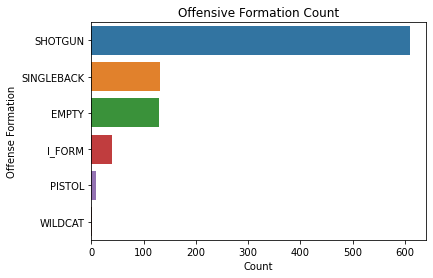

In [18]:
# Breakdown of Playtypes
sns.barplot(y=df_plays_final['offenseFormation'].value_counts().index,x=df_plays_final['offenseFormation'].value_counts())
plt.xlabel("Count")
plt.ylabel("Offense Formation")
plt.title("Offensive Formation Count");

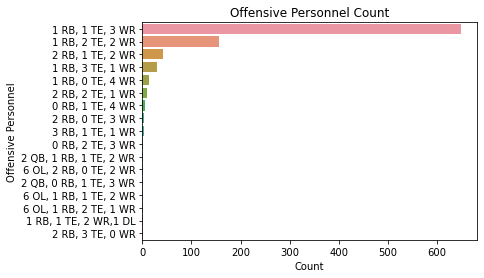

In [19]:
sns.barplot(y=df_plays_final['personnelO'].value_counts().index,x=df_plays_final['personnelO'].value_counts(),orient='h')
plt.xlabel("Count")
plt.ylabel("Offensive Personnel")
plt.title("Offensive Personnel Count");

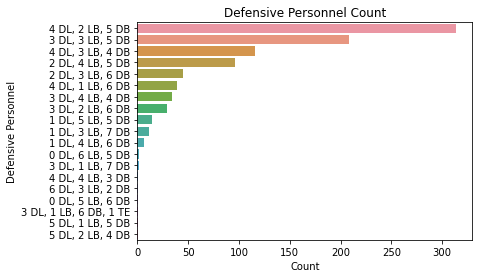

In [20]:
# Breakdown of Defensive Personnel
sns.barplot(y=df_plays_final['personnelD'].value_counts().index,x=df_plays_final['personnelD'].value_counts(),orient='h')
plt.xlabel("Count")
plt.ylabel("Defensive Personnel")
plt.title("Defensive Personnel Count");

I was interested to see if coverages were all similar in terms of EPA. At first glance, it appears that there's very little difference in average EPA based off the coverage. It would almost make sense to just say use a "Prevent Zone" coverage all the time. However, once we add in factors such as what down the plays were, the EPA numbers begin to change. This shows that depending on the circumstance, we cannot just blindly choose a Prevent Zone. Our data also shows that prevent zone was rarely used in our dataset. 

In [21]:
#Average EPA by Coverage
df_plays_final.groupby(['coverage'])['scaled_epa'].agg(['mean'])

,mean
coverage,
Cover 0 Man,0.568086
Cover 1 Man,0.574977
Cover 2 Man,0.570613
Cover 2 Zone,0.578073
Cover 3 Zone,0.572323
Cover 4 Zone,0.579605
Cover 6 Zone,0.572171
Prevent Zone,0.524001


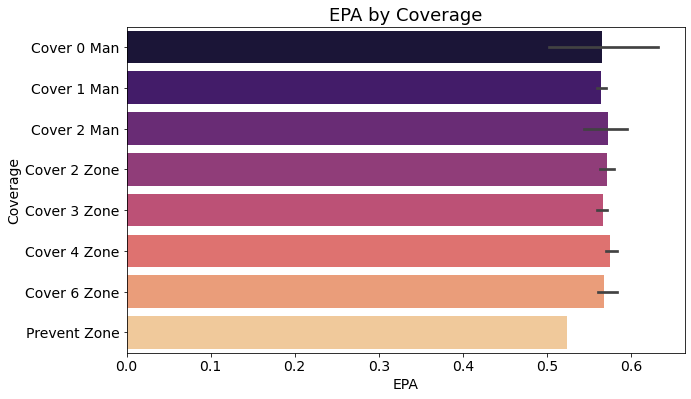

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['coverage'].sort_values(), x=df_plays_final['scaled_epa'], estimator=np.median, palette="magma")
plt.xlabel("EPA", fontdict={'fontsize':14});
plt.ylabel("Coverage", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("EPA by Coverage", fontdict={'fontsize':18});

In [23]:
#Average EPA by Coverage
df_plays_final.groupby(['coverage','down'])['scaled_epa'].agg(['mean'])

mean
coverage     down          
Cover 0 Man  1     0.568424
             2     0.553261
             3     0.581619
             4     0.556150
Cover 1 Man  1     0.578427
             2     0.575069
             3     0.578078
             4     0.458523
Cover 2 Man  1     0.592692
             2     0.575673
             3     0.556623
Cover 2 Zone 1     0.577799
             2     0.591420
             3     0.563388
             4     0.445754
Cover 3 Zone 1     0.579439
             2     0.571642
             3     0.564951
             4     0.461346
Cover 4 Zone 1     0.592618
             2     0.583366
             3     0.553885
             4     0.571388
Cover 6 Zone 1     0.602282
             2     0.547043
             3     0.577035
             4     0.404880
Prevent Zone 1     0.524001

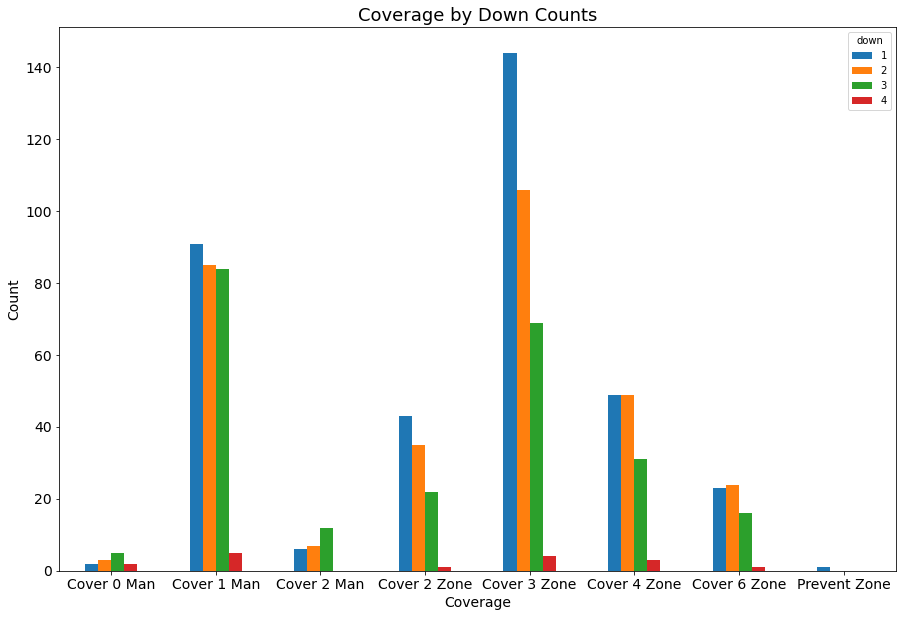

In [26]:
df_plot = df_plays_final.groupby(['coverage', 'down']).size().unstack(level=1)
df_plot.plot(kind = 'bar',figsize=(15,10))
plt.xlabel("Coverage", fontdict={'fontsize':14})
plt.xticks(rotation = 0)
plt.ylabel("Count", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Coverage by Down Counts", fontdict={'fontsize':18});

For the below, I wanted to see if specific coverages were tied to specific offensive personnel schemes, that way it would be easier to develop a recommendation. Personnel breakdowns are specifically just the count of players by position on the field. Defenses can run different types of players in order to counteract the offense. For example, if they believe a passing play is incoming, the defense can employ more DB's (Defensive Backs) at the cost of less linebackers. In other words, if the defense used Cover 2 Man, do they specifically run 2 DL, 4 LB, 5 DB? However, it looks like from the below, there are issues with that and teams run multiple personnel schemes with defensive coverages. For our initial MVP, we will work with finding out best coverage.

In [25]:
#Viewing EPA by Personnel and Yardage Sitautions
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_plays_final.groupby(['coverage','personnelD'])['gameId'].agg(['count'])

count
coverage     personnelD                   
Cover 0 Man  3 DL, 3 LB, 5 DB            1
             3 DL, 4 LB, 4 DB            2
             4 DL, 1 LB, 6 DB            2
             4 DL, 2 LB, 5 DB            4
             4 DL, 3 LB, 4 DB            2
             6 DL, 3 LB, 2 DB            1
Cover 1 Man  0 DL, 5 LB, 6 DB            1
             0 DL, 6 LB, 5 DB            1
             1 DL, 3 LB, 7 DB            1
             1 DL, 4 LB, 6 DB            1
             1 DL, 5 LB, 5 DB            6
             2 DL, 3 LB, 6 DB           18
             2 DL, 4 LB, 5 DB           28
             3 DL, 2 LB, 6 DB            5
             3 DL, 3 LB, 5 DB           63
             3 DL, 4 LB, 4 DB           13
             4 DL, 1 LB, 6 DB           10
             4 DL, 2 LB, 5 DB           78
             4 DL, 3 LB, 4 DB           38
             4 DL, 4 LB, 3 DB            1
Cover 2 Man  1 DL, 3 LB, 7 DB            3
             2 DL, 3 LB, 6 DB            2
             2 DL, 4 LB, 5 DB            2
             3 DL, 2 LB, 6 DB            3
             3 DL, 3 LB, 5 DB            8
             4 DL, 2 LB, 5 DB            7
Cover 2 Zone 1 DL, 4 LB, 6 DB            2
             1 DL, 5 LB, 5 DB            1
             2 DL, 3 LB, 6 DB            4
             2 DL, 4 LB, 5 DB            7
             3 DL, 2 LB, 6 DB            7
             3 DL, 3 LB, 5 DB           30
             3 DL, 4 LB, 4 DB            5
             4 DL, 2 LB, 5 DB           31
             4 DL, 3 LB, 4 DB           13
             5 DL, 1 LB, 5 DB            1
Cover 3 Zone 0 DL, 6 LB, 5 DB            1
             1 DL, 3 LB, 7 DB            3
             1 DL, 4 LB, 6 DB            3
             1 DL, 5 LB, 5 DB            3
             2 DL, 3 LB, 6 DB           11
             2 DL, 4 LB, 5 DB           43
             3 DL, 1 LB, 7 DB            1
             3 DL, 2 LB, 6 DB            7
             3 DL, 3 LB, 5 DB           71
             3 DL, 4 LB, 4 DB            7
             4 DL, 1 LB, 6 DB           17
             4 DL, 2 LB, 5 DB          119
             4 DL, 3 LB, 4 DB           36
             5 DL, 2 LB, 4 DB            1
Cover 4 Zone 1 DL, 3 LB, 7 DB            2
             1 DL, 5 LB, 5 DB            1
             2 DL, 3 LB, 6 DB            9
             2 DL, 4 LB, 5 DB            9
             3 DL, 1 LB, 7 DB            1
             3 DL, 2 LB, 6 DB            3
             3 DL, 3 LB, 5 DB           21
             3 DL, 4 LB, 4 DB            2
             4 DL, 1 LB, 6 DB            9
             4 DL, 2 LB, 5 DB           57
             4 DL, 3 LB, 4 DB           18
Cover 6 Zone 1 DL, 3 LB, 7 DB            2
             1 DL, 5 LB, 5 DB            3
             2 DL, 3 LB, 6 DB            1
             2 DL, 4 LB, 5 DB            7
             3 DL, 2 LB, 6 DB            4
             3 DL, 3 LB, 5 DB           14
             3 DL, 4 LB, 4 DB            5
             4 DL, 1 LB, 6 DB            1
             4 DL, 2 LB, 5 DB           18
             4 DL, 3 LB, 4 DB            9
Prevent Zone 3 DL, 1 LB, 6 DB, 1 TE      1

In [27]:
#Viewing EPA by Personnel and Yardage Sitautions
pd.set_option("display.max_rows", 101)
df_plays_final.groupby(['personnelD','yardsToGo'])['scaled_epa'].agg(['mean'])

mean
personnelD       yardsToGo          
0 DL, 5 LB, 6 DB 7          0.499642
0 DL, 6 LB, 5 DB 7          0.486291
                 11         0.489234
1 DL, 3 LB, 7 DB 3          0.515614
                 4          0.404880
...                              ...
4 DL, 3 LB, 4 DB 23         0.578292
4 DL, 4 LB, 3 DB 1          0.640030
5 DL, 1 LB, 5 DB 9          0.662653
5 DL, 2 LB, 4 DB 13         0.537468
6 DL, 3 LB, 2 DB 1          0.539438

[163 rows x 1 columns]

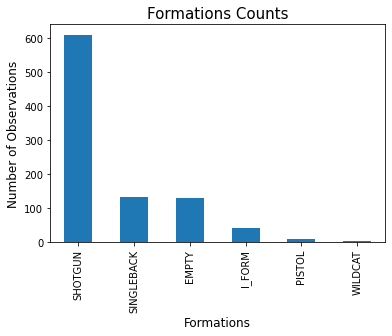

In [28]:
#Number of times Offensive Formation used
chart = df_plays_final['offenseFormation'].value_counts().plot(kind='bar');
chart.set_title('Formations Counts', fontsize=15);
chart.set_ylabel('Number of Observations', fontsize=12);
chart.set_xlabel('Formations', fontsize=12);

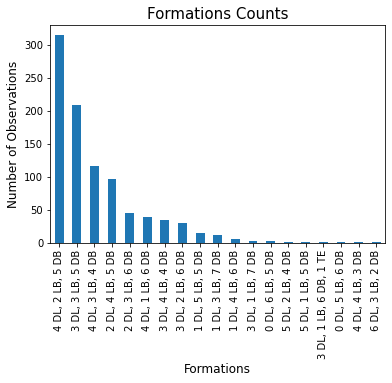

In [29]:
chart = df_plays_final['personnelD'].value_counts().plot(kind='bar');
chart.set_title('Formations Counts', fontsize=15);
chart.set_ylabel('Number of Observations', fontsize=12);
chart.set_xlabel('Formations', fontsize=12);

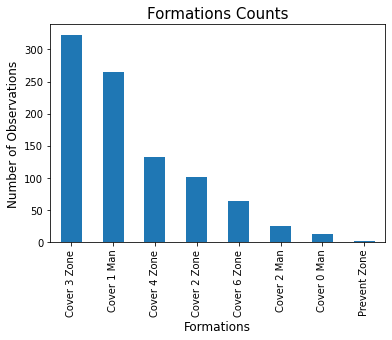

In [30]:
chart = df_plays_final['coverage'].value_counts().plot(kind='bar');
chart.set_title('Formations Counts', fontsize=15);
chart.set_ylabel('Number of Observations', fontsize=12);
chart.set_xlabel('Formations', fontsize=12);

Cover 3 Zone is one of the most popular formations in football. It is also one of the most basic coverages in football. In years prior, people thought it was elementary and used mainly for high school football, however, the Seattle Seahawks popularized this coverage scheme. The coverage is used frequently because it is balanced against both the run and pass offense. 

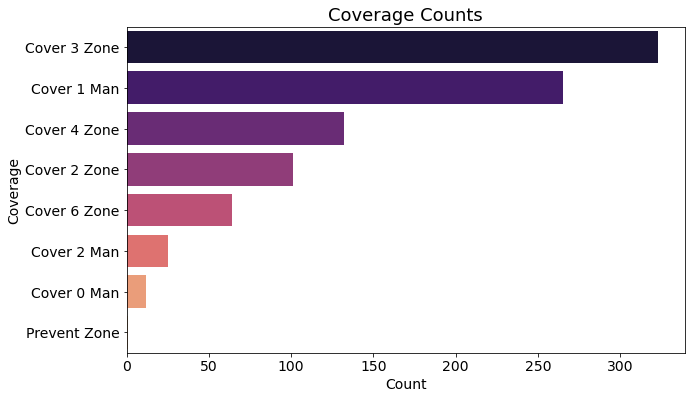

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['coverage'].value_counts().index, x=df_plays_final['coverage'].value_counts(), estimator=np.median, palette="magma")
plt.xlabel("Count", fontdict={'fontsize':14});
plt.ylabel("Coverage", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Coverage Counts", fontdict={'fontsize':18});

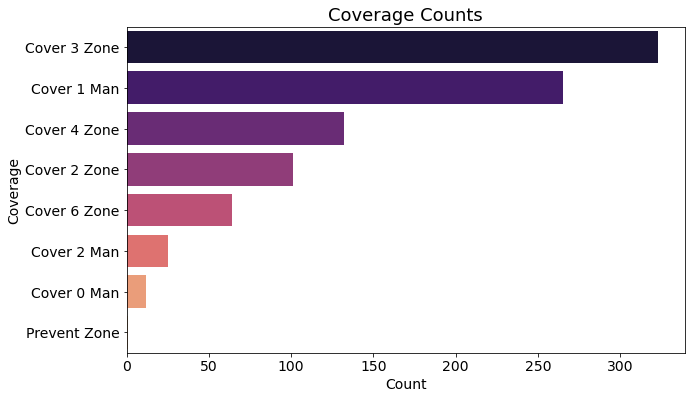

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['coverage'].value_counts().index, x=df_plays_final['coverage'].value_counts(), estimator=np.median, palette="magma")
plt.xlabel("Count", fontdict={'fontsize':14});
plt.ylabel("Coverage", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Coverage Counts", fontdict={'fontsize':18});

From below, we can see the commonly used defensive personnel scheme is a 4-2-5 or (4 DB, 2 LB, 5 DB). One of the biggest strengths of this defensive personnel is that it employs five defensive backs. With 5 defensive backs, your defense is able to be versatile in stopping the run and applying pressue to prevent the pass.

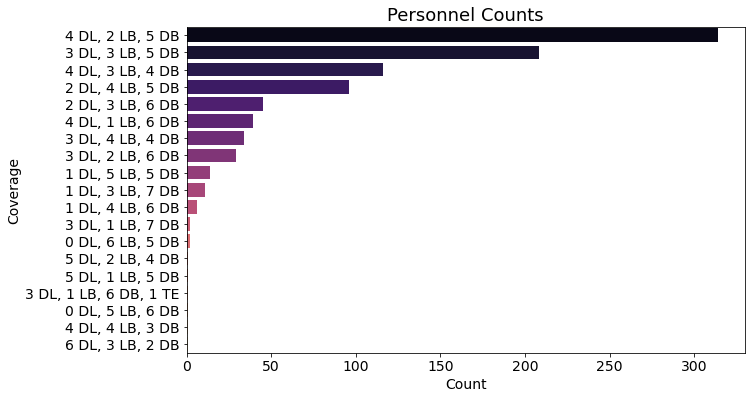

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['personnelD'].value_counts().index, x=df_plays_final['personnelD'].value_counts(), estimator=np.median, palette="magma")
plt.xlabel("Count", fontdict={'fontsize':14});
plt.ylabel("Coverage", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Personnel Counts", fontdict={'fontsize':18});

The 1 RB, 1 TE, 3 WR is also most widely known to be the common sets on the offensive side of football. With the exception of a few teams such as the San Francisco 49ers, most teams utilize this set quite often.

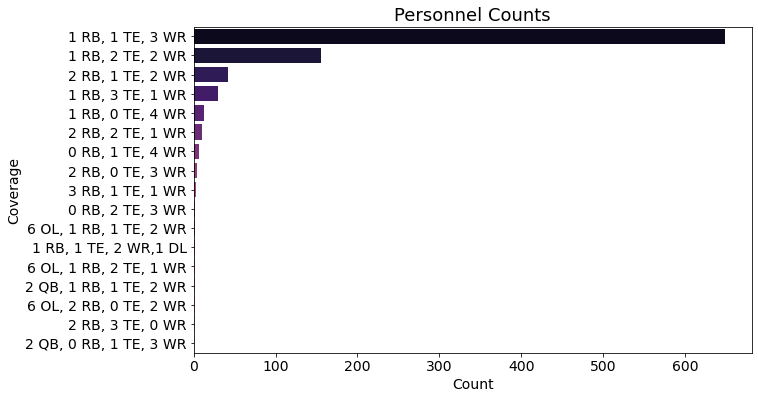

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['personnelO'].value_counts().index, x=df_plays_final['personnelO'].value_counts(), estimator=np.median, palette="magma")
plt.xlabel("Count", fontdict={'fontsize':14});
plt.ylabel("Coverage", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Personnel Counts", fontdict={'fontsize':18});

According to the below, numbers of defenders in the box is 6 most of the time. Very rarely do we see teams go towards the extreme ends of the spectrum and only employ 2 or 9 defenders in the box. This leaves vulnerabilities on opposite ends of the field. If teams leave no defenders in the box, it opens up the run game and if they stack the box with too many players, the passing defense can be easily breached.

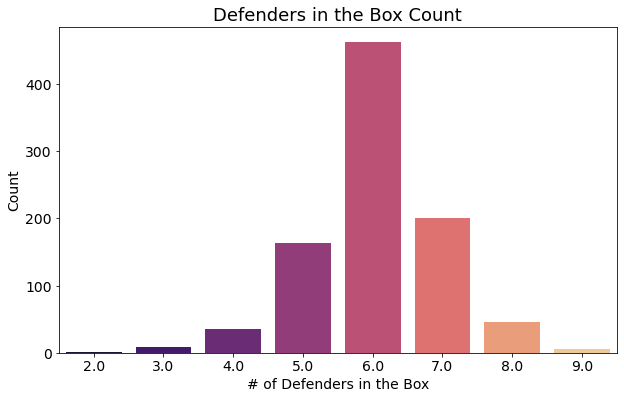

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_plays_final['defendersInTheBox'].value_counts().index, y=df_plays_final['defendersInTheBox'].value_counts(), estimator=np.median, palette="magma")
plt.xlabel("# of Defenders in the Box", fontdict={'fontsize':14});
plt.ylabel("Count", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Defenders in the Box Count", fontdict={'fontsize':18});

Number of pass rushers is by far and away 4. Obviously there will be very rare scenarios such as late game scenarios where the defense will send maybe only 2-3. Similar situation to the number of defenders in the box, 4 pass rushers seems to be the most balanced/commonly used option.

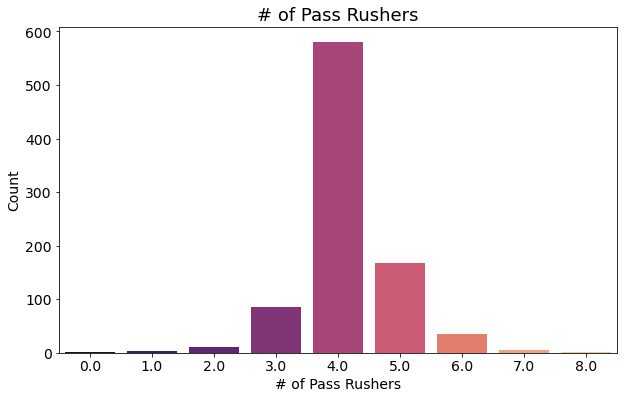

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_plays_final['numberOfPassRushers'].value_counts().index, y=df_plays_final['numberOfPassRushers'].value_counts(), estimator=np.median, palette="magma")
plt.xlabel("# of Pass Rushers", fontdict={'fontsize':14});
plt.ylabel("Count", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("# of Pass Rushers", fontdict={'fontsize':18});

Next, I wanted to see if teams favored any particular personnel set and if they performed better than others. It looked like overall, a lot of teams ran the 4 DL, 2LB, 5DB personnel set due to its flexibility. However, none of those personnel sets are going to be the end all be all solution on the defensive side. The EPA will also once again differ by situation. 

<Figure size 2160x2160 with 0 Axes>

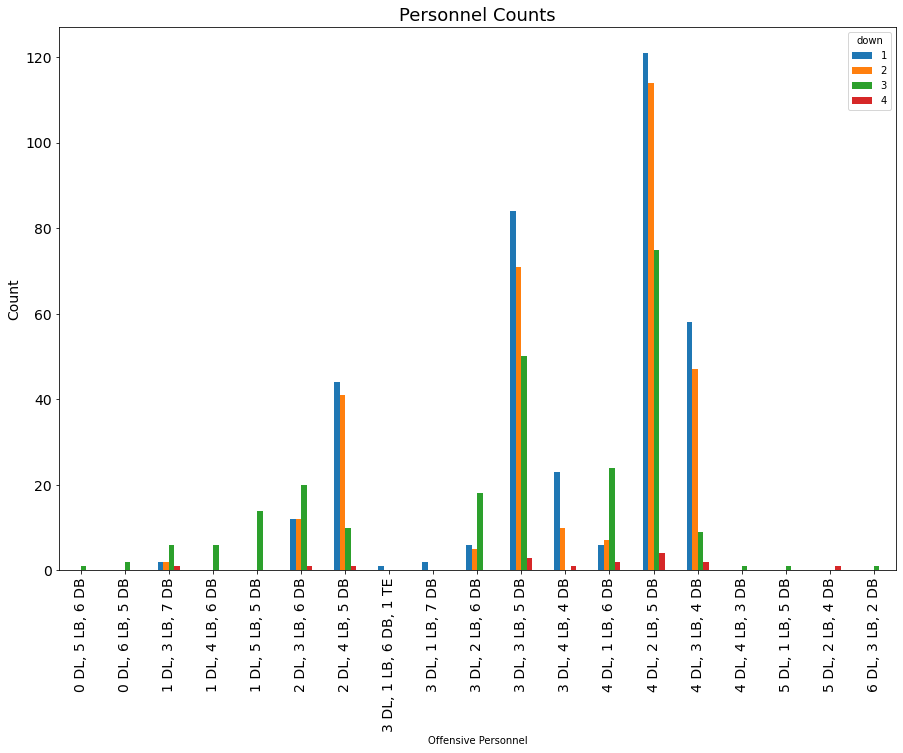

In [31]:
df_plot = df_plays_final.groupby(['personnelD', 'down']).size().unstack(level=1)
plt.figure(figsize=(30,30))
df_plot.plot(kind = 'bar',figsize=(15,10))
plt.xlabel("Offensive Personnel", fontdict={'fontsize':10});
plt.ylabel("Count", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Personnel Counts", fontdict={'fontsize':18});

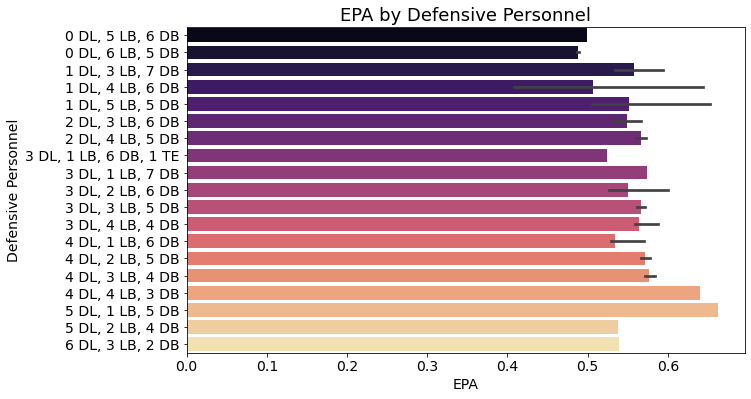

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['personnelD'].sort_values(), x=df_plays_final['scaled_epa'], estimator=np.median, palette="magma")
plt.xlabel("EPA", fontdict={'fontsize':14});
plt.ylabel("Defensive Personnel", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("EPA by Defensive Personnel", fontdict={'fontsize':18});

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['numberOfPassRushers'].sort_values(), x=df_plays_final['scaled_epa'],orient='h', estimator=np.median,palette="magma")
plt.xlabel("EPA", fontdict={'fontsize':14});
plt.ylabel("# of Rushers", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("# of Rushers", fontdict={'fontsize':18});

Error in callback <function flush_figures at 0x0000012A7F8CBEE0> (for post_execute):


KeyboardInterrupt: 

Do offenses thrive using one particular formation? According to the below, there's no strong favorite for best offensive position. There are also no clear favorites for offensive personnel. 

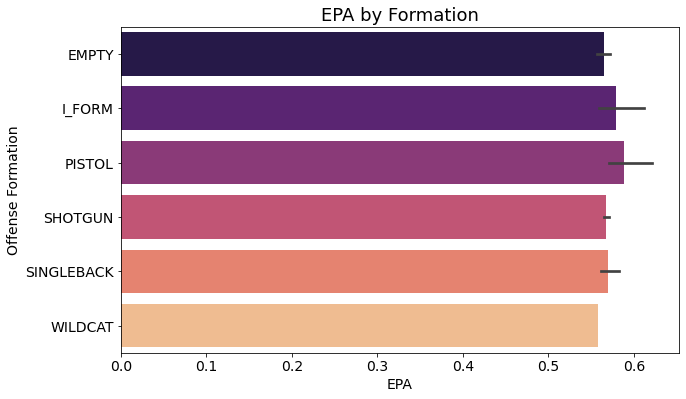

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['offenseFormation'].sort_values(), x=df_plays_final['scaled_epa'], estimator=np.median,palette="magma")
plt.xlabel("EPA", fontdict={'fontsize':14});
plt.ylabel("Offense Formation", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("EPA by Formation", fontdict={'fontsize':18});

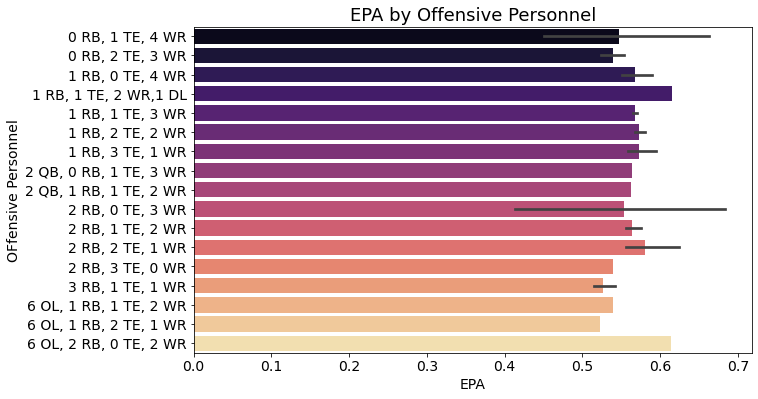

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_plays_final['personnelO'].sort_values(), x=df_plays_final['scaled_epa'], estimator=np.median, palette="magma")
plt.xlabel("EPA", fontdict={'fontsize':14});
plt.ylabel("OFfensive Personnel", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("EPA by Offensive Personnel", fontdict={'fontsize':18});

In [42]:
#View Our table 
df_plays_new.head()

,down,yardsToGo,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,scaled_epa,coverage,route,play_id,roof,surface,temp,wind
0,1,15,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",0.593125,Cover 3 Zone,NaN,75,outdoors,grass,81.0,8.0
1,1,10,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",0.562287,Cover 3 Zone,NaN,146,outdoors,grass,81.0,8.0
2,2,10,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",0.546221,Cover 3 Zone,NaN,168,outdoors,grass,81.0,8.0
3,3,10,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",0.728582,Cover 3 Zone,NaN,190,outdoors,grass,81.0,8.0
4,3,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",0.539438,Cover 0 Man,NaN,256,outdoors,grass,81.0,8.0


In [43]:
#Create Dummy columns
oform_dummies = pd.get_dummies(df_plays_new['offenseFormation'], drop_first=True)
roof_dummies = pd.get_dummies(df_plays_new['roof'], drop_first=True)
opersonnel_dummies = pd.get_dummies(df_plays_new['personnelO'], drop_first=True)
# dropback_dummies = pd.get_dummies(df_plays_final['typeDropback'],drop_first=True)
coverage_dummies = pd.get_dummies(df_plays_new['coverage'],drop_first=True)
surface_dummies = pd.get_dummies(df_plays_new['surface'], drop_first=True)
df_main = pd.concat([df_plays_new, oform_dummies,opersonnel_dummies,coverage_dummies,roof_dummies,surface_dummies], axis=1)

In [44]:
#View Columns in our new table
df_main.columns

Index(['down', 'yardsToGo', 'offenseFormation', 'personnelO',
       'defendersInTheBox', 'numberOfPassRushers', 'personnelD', 'scaled_epa',
       'coverage', 'route', 'play_id', 'roof', 'surface', 'temp', 'wind',
       'I_FORM', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT',
       '0 RB, 2 TE, 3 WR', '1 RB, 0 TE, 4 WR', '1 RB, 1 TE, 2 WR,1 DL',
       '1 RB, 1 TE, 3 WR', '1 RB, 2 TE, 2 WR', '1 RB, 3 TE, 1 WR',
       '2 QB, 0 RB, 1 TE, 3 WR', '2 QB, 1 RB, 1 TE, 2 WR', '2 RB, 0 TE, 3 WR',
       '2 RB, 1 TE, 2 WR', '2 RB, 2 TE, 1 WR', '2 RB, 3 TE, 0 WR',
       '3 RB, 1 TE, 1 WR', '6 OL, 1 RB, 1 TE, 2 WR', '6 OL, 1 RB, 2 TE, 1 WR',
       '6 OL, 2 RB, 0 TE, 2 WR', 'Cover 1 Man', 'Cover 2 Man', 'Cover 2 Zone',
       'Cover 3 Zone', 'Cover 4 Zone', 'Cover 6 Zone', 'Prevent Zone', 'dome',
       'outdoors', 'grass', 'sportturf'],
      dtype='object')

In [45]:
#Drop old categorical columns
df_main.drop(['personnelD','coverage','personnelO','offenseFormation','route','roof','surface','play_id'], axis=1, inplace=True)

In [46]:
#Drop NA Values, very little in dataset
with pd.option_context('mode.use_inf_as_na', True):
    df_main.dropna(inplace=True,how='all')

In [47]:
#Find Nan Rows
nan_rows = df_main[df_main['temp'].isnull()]

In [48]:
# Replace Nan with Mean for Temp + Wind
df_main['temp'].fillna((df_main['temp'].mean()), inplace=True)
df_main['wind'].fillna((df_main['wind'].mean()), inplace=True)

In [201]:
# Drop NA Values
df_main = df_main.apply (pd.to_numeric, errors='coerce')
df_main = df_main.dropna()

In [50]:
#Check for NA's
df_main.isna().sum()

down                      0
yardsToGo                 0
defendersInTheBox         0
numberOfPassRushers       0
scaled_epa                0
temp                      0
wind                      0
I_FORM                    0
PISTOL                    0
SHOTGUN                   0
SINGLEBACK                0
WILDCAT                   0
0 RB, 2 TE, 3 WR          0
1 RB, 0 TE, 4 WR          0
1 RB, 1 TE, 2 WR,1 DL     0
1 RB, 1 TE, 3 WR          0
1 RB, 2 TE, 2 WR          0
1 RB, 3 TE, 1 WR          0
2 QB, 0 RB, 1 TE, 3 WR    0
2 QB, 1 RB, 1 TE, 2 WR    0
2 RB, 0 TE, 3 WR          0
2 RB, 1 TE, 2 WR          0
2 RB, 2 TE, 1 WR          0
2 RB, 3 TE, 0 WR          0
3 RB, 1 TE, 1 WR          0
6 OL, 1 RB, 1 TE, 2 WR    0
6 OL, 1 RB, 2 TE, 1 WR    0
6 OL, 2 RB, 0 TE, 2 WR    0
Cover 1 Man               0
Cover 2 Man               0
Cover 2 Zone              0
Cover 3 Zone              0
Cover 4 Zone              0
Cover 6 Zone              0
Prevent Zone              0
dome                

## Setup Target Variable

In [51]:
# Our Target Variable is EPA and our features are all the other columns
y = df_main['scaled_epa']
X = df_main.drop(['scaled_epa'], axis=1)

In [52]:
# Also look at the STDEV of our data to see how our RMSE performs over the STDEV.
y.std()

0.07962482709664016

In [199]:
y.mean()

0.5723521227834149

Text(0, 0.5, 'Count')

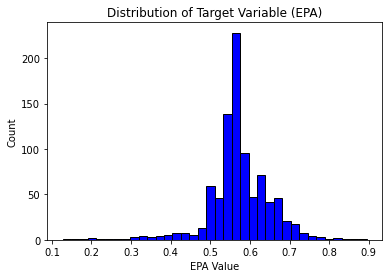

In [198]:
# matplotlib histogram of target variable
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Distribution of Target Variable (EPA)')
plt.xlabel('EPA Value')
plt.ylabel('Count')

Below is our list of features generated by our initial game situation numbers and categorical variables converted to Dummy columns

In [53]:
# Train Test Split my data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# scaler = StandardScaler()  
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)

## Run Regression Models

### 1st Model: Linear Regression

#### Cross Validation

In [218]:
# Run Cross Validate on Train and Test 
cv_results = cross_validate(linreg, X, y,return_train_score=True, scoring='neg_root_mean_squared_error',cv=3)
sorted(cv_results.keys())
cv_results

{'fit_time': array([0.00897717, 0.00797915, 0.0079782 ]),
 'score_time': array([0.00202203, 0.00299263, 0.00299287]),
 'test_score': array([-0.08318252, -0.07675457, -0.08330477]),
 'train_score': array([-0.07519893, -0.0799965 , -0.0757043 ])}

In [167]:
print(cv_results['test_score'].mean())
print(cv_results['train_score'].mean())

-0.08108062038269724
-0.0769665733915625


In [220]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
linreg = LinearRegression()
results_kfold = model_selection.cross_val_score(linreg, X, y, cv=kfold,scoring='neg_root_mean_squared_error')
print((results_kfold.mean())) 

-0.07880830236126155


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Our initial results from cross validation show that the linear regression model won't overfit to the data. The cross validation results from the test score and the train score are relatively close. The results from the test and train cross validation came out to 0.08 and 0.077 (convert the cv results to positive as the scoring method used was neg_root_mean_squared_error. 

#### Training/Evaluating Model

In [203]:
from math import sqrt
# Instantiate Model
linreg = LinearRegression()

# Fit to Training Data
lr_1 = linreg.fit(X_train, y_train)

# Predict on Test Set
y_pred = linreg.predict(X_test)

# Predict on Train Set
y_train_pred = linreg.predict(X_train)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", sqrt(mse))      
print("RMSE Train: ", mse_train**(1/2.0)) 
print("RMSE/STD: ", mse**(1/2.0)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

MSE:  0.007051258042809346
RMSE:  0.08397176932046475
RMSE Train:  0.07601615561068795
RMSE/STD:  1.054592799536616
RMSE/Mean:  0.14671347580943753


My first model was the linear regression model. The RMSE value comes out to about 0.84. Relative to the STD and the MEAN, it is about 1.05 and 0.15 respectively. This will serve as my baseline model to compare with my future iterations of models.

In [61]:
#poly = PolynomialFeatures(degree=2, include_bias=False)
#poly_data = poly.fit_transform(df_features)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly, target, random_state=9,test_size=0.2)

In [62]:
# # instantiate a linear regression object
# lm_2 = LinearRegression()

# #fit the linear regression to the data
# lm_2 = lm_3.fit(X_train2, y_train2)

# # Predict on Test Set
# y_pred = lm_2.predict(X_test)

# mse = mean_squared_error(y_test,y_pred)
# print("MSE: ", mse)
# print("RMSE: ", mse*(1/2.0)) 

### 2nd Model: DecisionTreeRegression Model

#### Cross Validation

In [168]:
# Run Cross Validate on Train and Test 
cv_results = cross_validate(DecisionTreeRegModel, X, y,return_train_score=True, scoring='neg_root_mean_squared_error',cv=3)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score', 'train_score']

In [169]:
print(cv_results['test_score'].mean())
print(cv_results['train_score'].mean())

-0.12020743042607962
-0.01209663499013558


In [63]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
DecisionTreeRegModel = DecisionTreeRegressor()
results_kfold = model_selection.cross_val_score(DecisionTreeRegModel, X, y, cv=kfold,scoring='neg_root_mean_squared_error')
print((results_kfold.mean())) 

-0.1080004931167341


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Upon cross validation of a DecisionTree regression model, it looks like the model is overfitting to our training set. Our scores from the training and test score cross validation come out to 0.12 and 0.012 (our scoring was neg_root_mean_squared_error so we can convert our numbers to positive (+) in order to return the RMSE). I will run the model and re-evaluate. 

#### Training/Evaluating Model

In [211]:
# Instantiate Model
DecisionTreeRegModel = DecisionTreeRegressor()

# Fit to Training Data
DecisionTreeRegModel.fit(X_train, y_train)

# Predict on Train Set
y_train_pred = DecisionTreeRegModel.predict(X_train)

# Predict on Test Set
y_pred = DecisionTreeRegModel.predict(X_test)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("RMSE Train: ", mse_train**(1/2.0)) 
print("RMSE/STD: ", mse**(1/2.0)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

MSE:  0.011803600180114884
RMSE:  0.10864437482039686
RMSE Train:  0.012362307650640947
RMSE/STD:  1.3644535100658473
RMSE/Mean:  0.18982086463145564


My 2nd Model was a DecisionTreeRegressor model using the default parameters. After evaluating, the RMSE came out to a higher value than our baseline model. When compared to our STD, the model will have an total RMSE range that is almost 1.4 STDEV's. We will be dropping this model for now. Afte re-evaluating, this model also seems to be overfitting to the train set.

### Random Forest Regression Model

#### Cross Validation

In [170]:
# Run Cross Validate on Train and Test 
cv_results = cross_validate(DecisionTreeRegModel, X, y,return_train_score=True, scoring='neg_root_mean_squared_error',cv=3)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score', 'train_score']

In [171]:
print(cv_results['test_score'].mean())
print(cv_results['train_score'].mean())

-0.11736734716710255
-0.01209663499013558


In [65]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
rfr = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(rfr, X, y, cv=kfold,scoring='neg_root_mean_squared_error')
print((results_kfold.mean())) 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-0.0829067803029117


After running cross validation on my Random Forest Regresion model, it also looks like this model is overfitting to our training set. Keeping this in mind, I will run my model and confirm with RMSE tests on both the training and test set.

#### Training/Evaluating Model

In [224]:
# Instantiate Model
rfr = RandomForestRegressor()
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

# Fit to Training Data
rfr.fit(X_train, y_train)

# Predict on Training Data
y_train_pred = rfr.predict(X_train)

# Predict on Test Set
y_pred = rfr.predict(X_test)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("RMSE Train: ", mse_train**(1/2.0)) 
print("RMSE/STD: ", mse**(1/2.0)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

MSE:  0.00786290409223543
RMSE:  0.08867301783651795
RMSE Train:  0.033252782261114444
RMSE/STD:  1.1136352952942183
RMSE/Mean:  0.15492738526991173


Model performance was better than our previous model. The model generated an RMSE of 0.08 which is about 1.11 standard deviations or 0.15 when divided by the mean. however still not as good as our baseline model. This model was slightly less overfit. 

### Gradiest Boosting Regressor Model

#### Cross Validation

In [194]:
# Run Cross Validate on Train and Test 
cv_results = cross_validate(gbr, X, y,return_train_score=True, scoring='neg_root_mean_squared_error',cv=3)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score', 'train_score']

In [179]:
print(cv_results['test_score'].mean())
print(cv_results['train_score'].mean())

-0.08362596109443084
-0.06337404755687572


In [67]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
gbr = GradientBoostingRegressor()
results_kfold = model_selection.cross_val_score(gbr, X, y, cv=kfold,scoring='neg_root_mean_squared_error')
print((results_kfold.mean())) 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-0.081821885876135


My initial cross validation on the Gradiest Boosting Regression model shows that the model won't overfit to our data. Similar to the situation with our linear regression model, the results from our cross validation for the training set and test set are relatively similar.

#### Training/Evaluating Model

In [215]:
# Instantiate Model
gbr = GradientBoostingRegressor()

# Fit to Training Data
gbr.fit(X_train, y_train)

# Predict on Training Data
y_pred = gbr.predict(X_test)

# Predict on Training Data
y_train_pred = gbr.predict(X_train)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2)) 
print("RMSE Train: ", mse_train**(1/2)) 
print("RMSE/STD: ", mse**(1/2)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

MSE:  0.007679595760746288
RMSE:  0.08763330280633207
RMSE Train:  0.06246759102947919
RMSE/STD:  1.1005776213488296
RMSE/Mean:  0.15311081992700776


Our GradiestBoosting Regression model results show that once again, the model is not overfitting from the results of our RMSE in our training set and our test set (values of 0.087 vs 0.062). The performance results show that the RMSE was about 0.08. This when compared to our STD and mean of our target variable comes out to about 1.1 and 0.15 respectively. This model appears to be a good candidate for GridSearch as the performance was slightly worse than our initial linear regression but overfitting does not appear to be an issue. I will try tuning some of the parameters using GridSearch to see if performance improves.

### XGBoost

#### Cross Validation

In [176]:
cv_results = cross_validate(xgr, X, y,return_train_score=True, scoring='neg_root_mean_squared_error',cv=3)
sorted(cv_results.keys())

[23:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

['fit_time', 'score_time', 'test_score', 'train_score']

In [177]:
print(cv_results['test_score'].mean())
print(cv_results['train_score'].mean())

-0.08726916257718953
-0.08717368665312519


In [69]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
xgr = xgb.XGBRegressor()
results_kfold = model_selection.cross_val_score(xgr, X, y, cv=kfold,scoring='neg_root_mean_squared_error')
print((results_kfold.mean())) 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-0.09190704933101695


The results from our cross validation show almost no overfitting. The model performance was almost identical when comparing the results of our cross validation in the training set and the test set. The rmse values of our train and test set both came out to about 0.087 (when converted from neg root mean squared to positive). I will go on with this model and see how it performs when fitted to our data.

#### Training/Evaluating Model

In [229]:
# Instantiate Model
xgr = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Instantiate Model
xgr.fit(X_train,y_train)

# Predict on Training Data
y_train_pred = rfr.predict(X_train)

# Fit to Training Data
y_pred = xgr.predict(X_test)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("RMSE Train: ", mse_train**(1/2.0)) 
print("RMSE/STD: ", mse**(1/2.0)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

[12:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
MSE:  0.007780537470208518
RMSE:  0.08820735496662689
RMSE Train:  0.033252782261114444
RMSE/STD:  1.107787083287103
RMSE/Mean:  0.15411379019206617


Similar to our previous model, this model performs slightly worse than our baseline linear regression model. However, the model had RMSE results that were 1.11 and 0.15 when compared to the standard deviation and the mean of the target variable. When looking at the results of the RMSE when comparing the training and testing set, there could be a chance of slight overfitting to our train set. I will run GridSearch on this model as well to see if I can tweak some of the parameters and improve the performance and review the fit of the model once again.

### GridSearch

#### Gradient Boosting Regression GridSearch

In [231]:
## Setup Parameters For GridSearch
parameters={'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200,500], 
            'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
            'max_depth': [1,2,3,4,5,6,7,8,9,10], 
            #'min_samples_leaf': [np.linspace(0.1, 1.0, 10, endpoint=True)], 
            'max_features': list(range(1,df_main.shape[1]))} 

In [232]:
# Run GridSearch
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 2, n_jobs=-1,scoring='neg_root_mean_squared_error')
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200,
                                          500]},
             scoring='neg_root_mean_squared_error')

In [235]:
# Find Results from GridSearch
print(" Results from GridSearch " )
print("\n The best estimator across ALL searched params: \n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from GridSearch 

 The best estimator across ALL searched params: 
 GradientBoostingRegressor(learning_rate=0.5, max_features=14, n_estimators=2)

 The best score across ALL searched params:
 -0.0770852028203716

 The best parameters across ALL searched params:
 {'learning_rate': 0.5, 'max_depth': 3, 'max_features': 14, 'n_estimators': 2}


In [256]:
# Re-run GBR with New Params
gbr = GradientBoostingRegressor(learning_rate= 0.5, max_depth= 3, max_features= 14, n_estimators= 2)

# Fit to Training Data
gbr.fit(X_train, y_train)

# Predict on Test Data
y_pred = gbr.predict(X_test)

# Predict on Training Data
y_train_pred = gbr.predict(X_train)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("RMSE Train: ", mse_train**(1/2.0)) 
print("RMSE/STD: ", mse**(1/2.0)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

MSE:  0.006641482298346989
RMSE:  0.08149529003781132
RMSE Train:  0.07536550499648953
RMSE/STD:  1.0234909513699915
RMSE/Mean:  0.1423866301770495


In [255]:
# Merge Predictions with Actuals
reset = y_test.reset_index()
df_preds = pd.concat([reset,pd.Series(y_pred)],axis=1).rename(columns={0:'Y Test Preds'})
df_preds

,index,scaled_epa,Y Test Preds
0,126,0.539433,0.568555
1,354,0.568056,0.581309
2,590,0.548218,0.566115
3,509,0.537528,0.576184
4,846,0.678589,0.554848
...,...,...,...
218,882,0.514564,0.575182
219,143,0.293632,0.574209
220,390,0.571126,0.571240
221,622,0.545634,0.571240


Upon first glance, the model is performing well. The RMSE of the train and the testing set are 0.082 and 0.075 respectively, showign that there is no overfitting of the model. The RMSE of the model comes out to 0.082. Relative to the standard deviation and the mean that is about 1.03 and .143. This is in terms of performance, a better performing model than the previous iterations and better than our baseline linear regression model. However, when viewing the results of the model output, it appears the model likes to most likely repeats the same output of about .57 EPA and achieves good results in a naive manner.  

#### XGR GridSearch

In [193]:
# Setup Parameters for GridSearch on XGR
params = {'learning_rate': [.03, 0.05, .07, 0.10, 0.15], #so called `eta` value
              'max_depth': range (2, 10, 1),
              'min_child_weight': [1, 3, 5, 10],
              'n_estimators': [100,300,500]}

In [183]:
# Instantiate and Fit on Training Data
grid_xgr = GridSearchCV(estimator=xgr, param_grid = params, cv = 2, n_jobs=-1,scoring='neg_root_mean_squared_error')
grid_xgr.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.15, max_delta_step=0,
                                    max_depth=2, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             

In [234]:
# Find reuslts of GridSearch
print(" Results from GridSearch " )
print("\n The best estimator across ALL searched params:\n",grid_xgr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_xgr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgr.best_params_)

 Results from GridSearch 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

 The best score across ALL searched params:
 -0.07756535186305354

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100}


In [245]:
# Re-run XGR with New Params
xgr = xgb.XGBRegressor(             learning_rate=0.05, 
                                    max_depth=2, min_child_weight=3,
                                    n_estimators=100)

# Fit to Training Data
xgr.fit(X_train,y_train)

# Predict on Test Set
y_pred = xgr.predict(X_test)

# Predict on Training Data
y_train_pred = gbr.predict(X_train)

#Calculate MSE/RMSE
mse_train = mean_squared_error(y_train,y_train_pred)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("RMSE Train: ", mse_train**(1/2.0)) 
print("RMSE/STD: ", mse**(1/2.0)/y.std())
print("RMSE/Mean: ", mse**(1/2.0)/y.mean())

MSE:  0.006849483014623189
RMSE:  0.0827616035044222
RMSE Train:  0.0753405672145383
RMSE/STD:  1.0393944517326856
RMSE/Mean:  0.14459910291228223


In [246]:
# Merge Predictions with Actuals
reset = y_test.reset_index()
df_preds = pd.concat([reset,pd.Series(y_pred)],axis=1).rename(columns={0:'Y Test Preds'})
df_preds

,index,scaled_epa,Y Test Preds
0,126,0.539433,0.570321
1,354,0.568056,0.587631
2,590,0.548218,0.571528
3,509,0.537528,0.578094
4,846,0.678589,0.547799
...,...,...,...
218,882,0.514564,0.554772
219,143,0.293632,0.571883
220,390,0.571126,0.571991
221,622,0.545634,0.576986


After re-running our XGBooster Regression model, I was able to reduce my RMSE to 0.083. Relative to our standard deviation and mean, that is about 1.04 and 0.14 respectively. In comparison to my previous iterations, this has been the best performing model since our initial linear regression model. The RMSE of our train and test data also show that our results are not overfitting to our training set. Unlike the tuned GradientBoosting model, the model doesn't simply repeat a common prediction and achieve higher performance results. The XGBoost Regression model is the best performing model in terms of performance, fitting, and output frequency.

In [182]:
import pickle

In [257]:
# Pickle our model so we can reopen later
with open('model.pkl','wb') as f:
    pickle.dump(xgr,f)

### View Predictions

In [241]:
# Merge Predictions with Actuals
reset = y_test.reset_index()
df_preds = pd.concat([reset,pd.Series(y_pred)],axis=1).rename(columns={0:'Y Test Preds'})
df_preds

,index,scaled_epa,Y Test Preds
0,126,0.539433,0.570321
1,354,0.568056,0.587631
2,590,0.548218,0.571528
3,509,0.537528,0.578094
4,846,0.678589,0.547799
...,...,...,...
218,882,0.514564,0.554772
219,143,0.293632,0.571883
220,390,0.571126,0.571991
221,622,0.545634,0.576986


## Results

Our best performing model Our most optimal model was the tuned XGBRegressor model. Relative to our STDEV and mean, our results came out to about 1.04 and 0.14 respectively. Our target variable as shown earlier shows somewhat of a normal distribution. Our model shows promise, however due our RMSE covering about 1 standard deviation in error (about 70% of our data), our model will require more tuning before being put into actual practice.  Next steps will require gathering coverage from other weeks of data in order to make our models more accurate. 